<div style='font-size:200%;'>
    <a></a>
    <h1 style='color: green; font-weight: bold; font-family: Cascadia code;'>
        <center>Lung cancer prediction using Image-Segmentation, Equalization and Transfer learning</center>
    </h1>
</div>

- - -

<!-- <div style='font-size:200%;'>
    <a id='nan'></a>
    <h1 style='color: chartreuse; font-weight: bold; font-family: Cascadia code;'> Contents </h1>
</div> -->

<!-- - [Importing the necessary libraries ](#import)
- [Data Pre-processing](#preprocess)
- [Exploratory Data Analysis](#eda)
    - [NaN values heat-map](#heatmap)
    - [Typecasting and dropping columns](#typecast)
    - [Correlation between different features and our target variable](#corr)
    - [Distribution of Individuals based on HomePlanet](#planet)
- [Distribution of transported individuals](#trans)
- [Data Pre-processing](#preprocess)
    - [Imputing missing data](#impute)
    - [Typecasting and dropping columns](#typecast)
    - [One-Hot Encoding](#ohe)
    - [Splitting data into x (Values) and y (labels)](#split)
- [Classifying](#classify)
    - [Building and fitting the models](#build)
    - [Performance Analysis of the different models](#anal)
- [Submission](#submit) -->

- - -

## **Abstract:**
 
The second leading cause of death is cancer [9]. From this large domain of cancer, lung cancer is one of the main reasons for death in the world among both men and women, with an impressive rate of about five million deadly cases per year. Every year more than 2,00,000 cases are found in US [11]. Because of high quantity data in CT images and blurred boundaries, tumor segmentation and classification is very hard. In MR images, the amount of data is too much for manual interpretation and analysis. At a very early stage, cancer is not being found because of the small size of the nodules and location of the glands [11]. 
 Machine Learning makes the diagnosis process easier and deterministic. This work has introduced one automatic lung cancer detection method to increase the accuracy and yield and decrease the diagnosis time. The main objective of this work is to detect the cancerous lung nodules from a given input lung image and to predict the lung cancer using Deep Learning technique more efficiently than the existings. 

- - -

<h1 ><a id='contents'><b>Contents<b></a></h1>

- [Importing necessary libraries](#import)
- [Proposed methodology](#methodology)
- [Data Pre-processing](#preprocess)
- [Comparison between processed and unprocessed image](#comparison)
- [Splitting the processed images](#split)
- [Neural nets](#nn)
    - [CNN](#cnn)
    - [VGG16](#vgg16)
    - [VGG19](#vgg19)
    - [MobileNet](#mobilenet)
    - [ResNet50](#resnet50)
    - [Xception](#xception)
    - [InceptionV3](#inceptionv3)
- [Example: Prediction vs Truth](#example)
- [Comparative analysis of the models](#analysis)
- [References](#references)

- - -

<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Importing the necessary libraries</center>
    </h1>
</div>

In [8]:
!pip install opencv-python
!pip install split-folders
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
import splitfolders
import pandas as pd
import numpy as np
import seaborn as sns



<div style='font-size:100%;'>
    <a id='methodology'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Proposed Methodology</center>
    </h1>
</div>

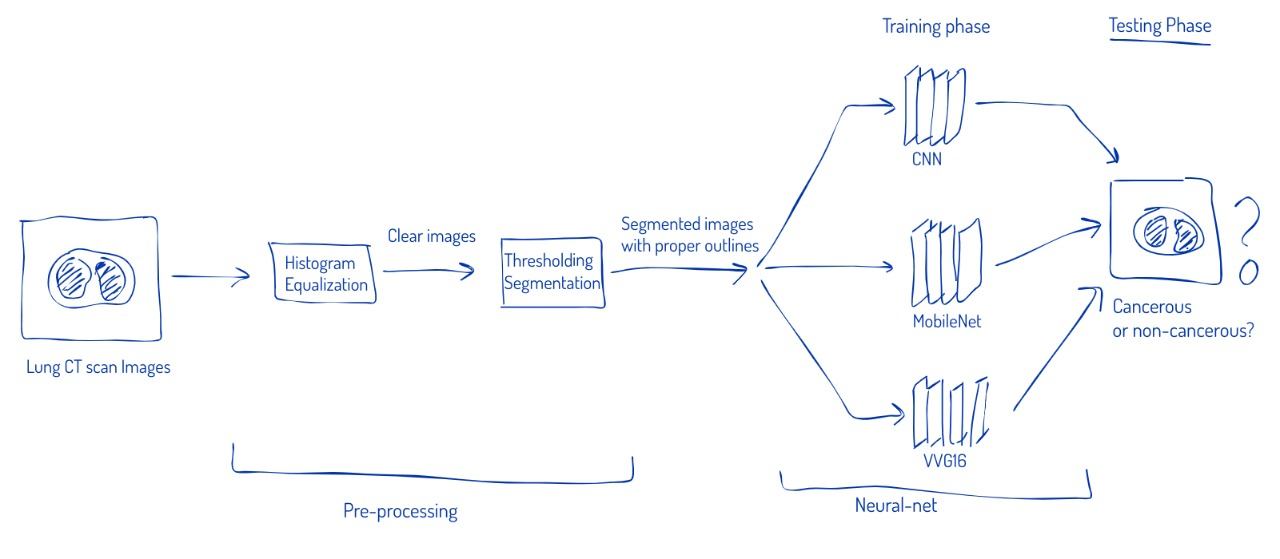

In [10]:
Image(filename='./methodology.jpeg') 

<div style='font-size:100%;'>
    <a id='preprocess'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Data Pre-processing</center>
    </h1>
</div>

## **Histogram Equalization**

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

## **Threshold Segmentation**

Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

#### ***We will preprocess our raw data by histogram equalization and then segment it using thresholding***

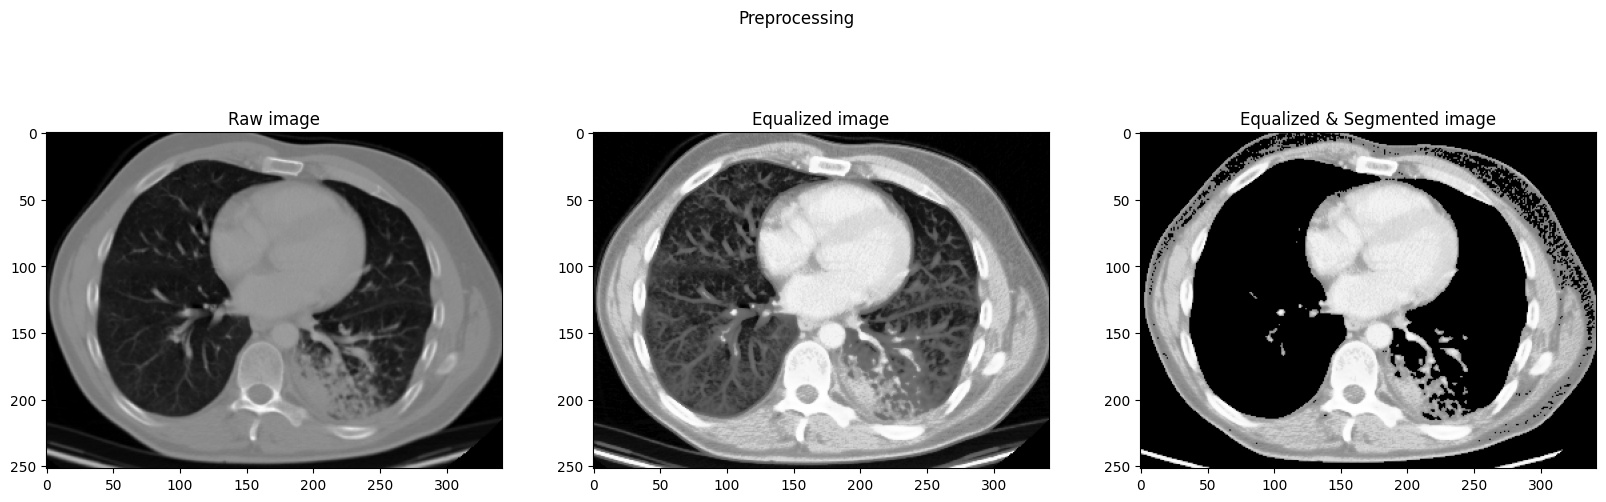

In [12]:
img = cv2.imread('./rawData/squamous.cell.carcinoma/squamous.cell.carcinoma1.png', 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [13]:
print(os.getcwd(), os.listdir())
DIR = './rawData'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = './data'

c:\Users\rajum\Desktop\hameerproject\lung-cancer ['CNN.png', 'data', 'eval.txt', 'InceptionV3.png', 'methodology.jpeg', 'MOBILENET.png', 'notebook.ipynb', 'processedData', 'rawData', 'rawData.zip', 'README.md', 'ResNet50.png', 'VGG16.png', 'VGG19.png', 'Xception.png']


In [14]:
!unzip /content/drive/MyDrive/rawData.zip -d /content

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
if not os.path.exists(DEST_DIR):
    !mkdir data && cd data && mkdir cancerous && mkdir non-cancerous

for category in CATS:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        curr = os.path.join(path, image)
        img = cv2.imread(curr, 0)
        equalizedImage = cv2.equalizeHist(img)
        e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)
        if category == 'normal':
            imgDest = curr.replace('rawData/normal', 'data/non-cancerous')
            cv2.imwrite(imgDest, segmentedImage)
        else:
            imgDest = curr.replace('rawData/adenocarcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/large.cell.carcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/squamous.cell.carcinoma', 'data/cancerous')
            cv2.imwrite(imgDest, segmentedImage)
print("Processed data directory created successfully at", DEST_DIR)

Processed data directory created successfully at ./data


<div style='font-size:100%;'>
    <a id='comparison'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Comparison between processed and unprocessed image</center>
    </h1>
</div>

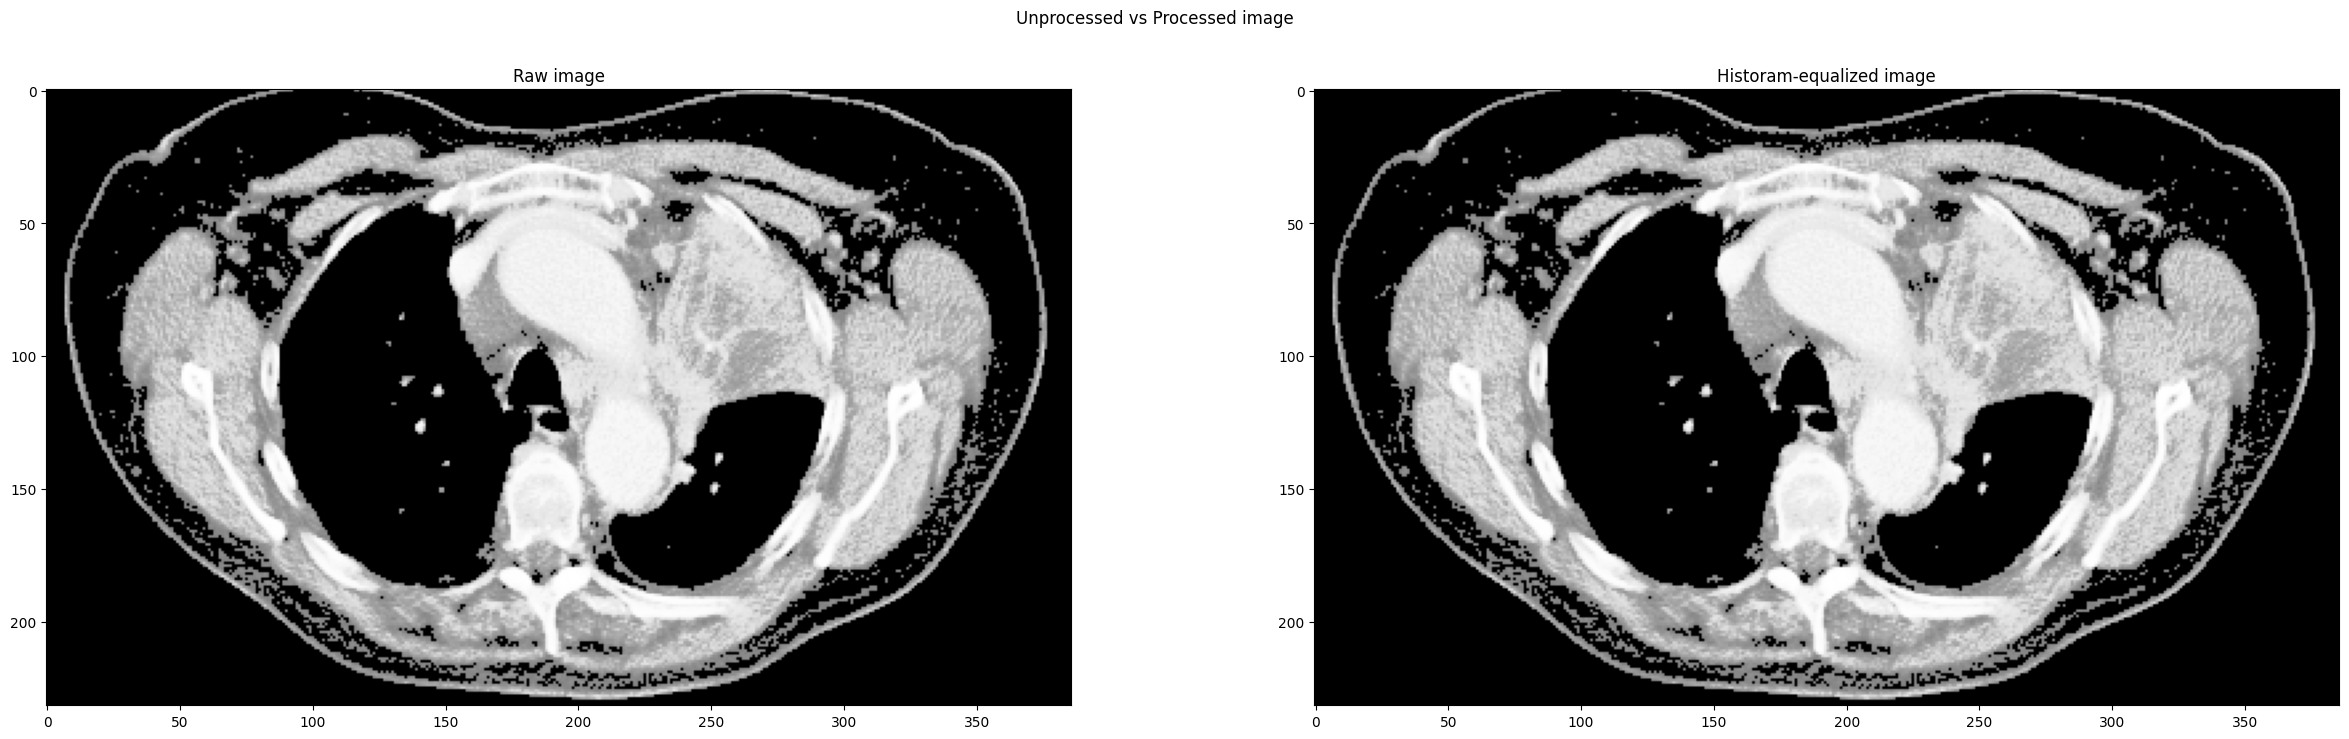

In [16]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

<div style='font-size:100%;'>
    <a id='split'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Splitting the processed images</center>
    </h1>
</div>

In [17]:
FINAL_DIR = './processedData'

splitfolders.ratio(DEST_DIR, output=FINAL_DIR, seed=69420, ratio=(.7, 0.1,0.2)) 

Copying files: 0 files [00:00, ? files/s]

Copying files: 1000 files [00:15, 63.40 files/s]


In [19]:
#from google.colab import drive
#drive.mount('/content/drive')

In [20]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,                  
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [23]:
train_dataset  = train_datagen.flow_from_directory(directory = './processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 699 images belonging to 2 classes.


In [24]:
valid_dataset = valid_datagen.flow_from_directory(directory = './processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [26]:
test_dataset = test_datagen.flow_from_directory(directory = './processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 202 images belonging to 2 classes.


<div style='font-size:100%;'>
    <a id='nn'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Neural nets</center>
    </h1>
</div>

In [27]:
def F1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),  
      tf.keras.metrics.AUC(name='AUC'),
      F1,
]

def plot_history(hist, name):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].plot(hist.history['Accuracy'])
  axs[0].plot(hist.history['val_Accuracy'])
  axs[0].set_title(f'{name} Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['train', 'val', 'F1', 'Recall'], loc='upper left')

  axs[1].plot(hist.history['loss'])
  axs[1].plot(hist.history['val_loss'])
  axs[1].set_title(f'{name} Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'val'], loc='upper left')

  axs[2].plot(hist.history['Precision'])
  axs[2].plot(hist.history['val_Precision'])
  axs[2].set_title(f'{name} Precision')
  axs[2].set_ylabel('Precision')
  axs[2].set_xlabel('Epoch')
  axs[2].legend(['train', 'val'], loc='upper left')

  plt.show()


<h1 align="center" ><a id='cnn'><b>CNN<b></a></h1>

In [29]:
import tensorflow as tf

# Define the input layer explicitly
CNN = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Explicit input layer
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

CNN.summary()

# Define metrics (if not already defined)
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),  # Updated to proper function call
              metrics=METRICS)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


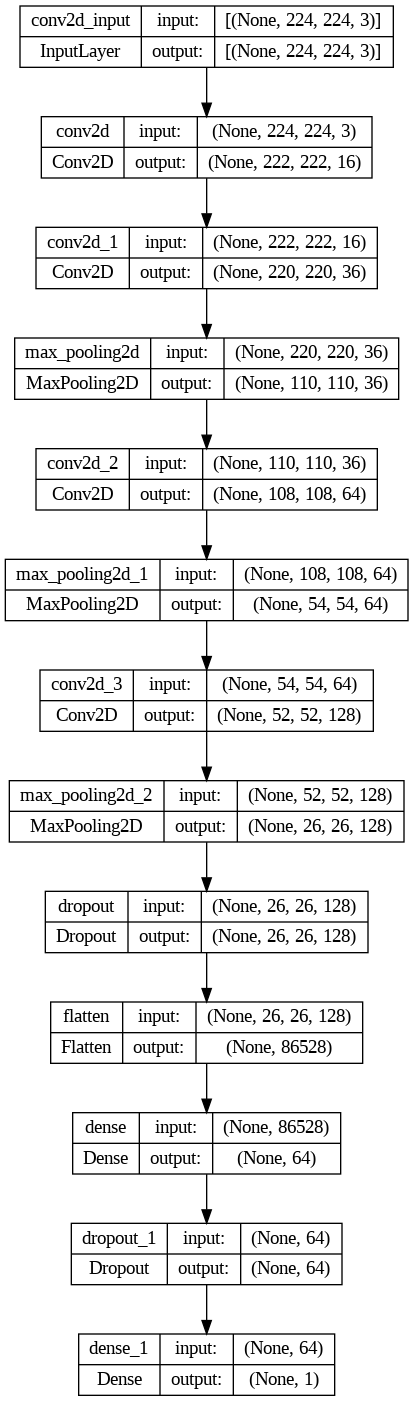

In [30]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)
Image(filename='CNN.png')

In [31]:
!pip install pydot

In [32]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN_history = CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

c:\Users\rajum\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7101 - loss: 0.8458 - precision: 0.1923 - recall: 0.1442

22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7123 - loss: 0.8387 - precision: 0.1923 - recall: 0.1394 - val_accuracy: 0.7879 - val_loss: 0.5225 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7734 - loss: 0.5369 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7879 - val_loss: 0.4766 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7889 - loss: 0.4999 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7879 - val_loss: 0.4185 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7912 - loss: 0.4522 - precision: 0.4221 - recall: 0.0149

22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7913 - loss: 0.4519 - precision: 0.4410 - recall: 0.0160 - val_accuracy: 0.8182 - val_loss: 0.3544 - val_precision: 1.0000 - val_recall: 0.1429 - learning_rate: 0.0010
Epoch 5/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8142 - loss: 0.3928 - precision: 0.8915 - recall: 0.1580 - val_accuracy: 0.7475 - val_loss: 0.4982 - val_precision: 0.4565 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8333 - loss: 0.3983 - precision: 0.7286 - recall: 0.4043

22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8335 - loss: 0.3971 - precision: 0.7276 - recall: 0.4046 - val_accuracy: 0.8889 - val_loss: 0.2542 - val_precision: 1.0000 - val_recall: 0.4762 - learning_rate: 0.0010
Epoch 7/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8449 - loss: 0.3501 - precision: 0.8228 - recall: 0.4461

22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8455 - loss: 0.3491 - precision: 0.8211 - recall: 0.4476 - val_accuracy: 0.9495 - val_loss: 0.1824 - val_precision: 1.0000 - val_recall: 0.7619 - learning_rate: 0.0010
Epoch 8/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8568 - loss: 0.3822 - precision: 0.7174 - recall: 0.5111 - val_accuracy: 0.9293 - val_loss: 0.2427 - val_precision: 0.7500 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8762 - loss: 0.3009 - precision: 0.8508 - recall: 0.5122 - val_accuracy: 0.7475 - val_loss: 0.5218 - val_precision: 0.4565 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 10/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8564 - loss: 0.3361 - precision: 0.7012 - recall: 0.6559
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8566 - loss: 0.3363 - precision: 0.7023 - recall: 0.6520 - val_a

In [33]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - accuracy: 0.5878 - loss: 0.6690 - precision: 0.3307 - recall: 1.0000


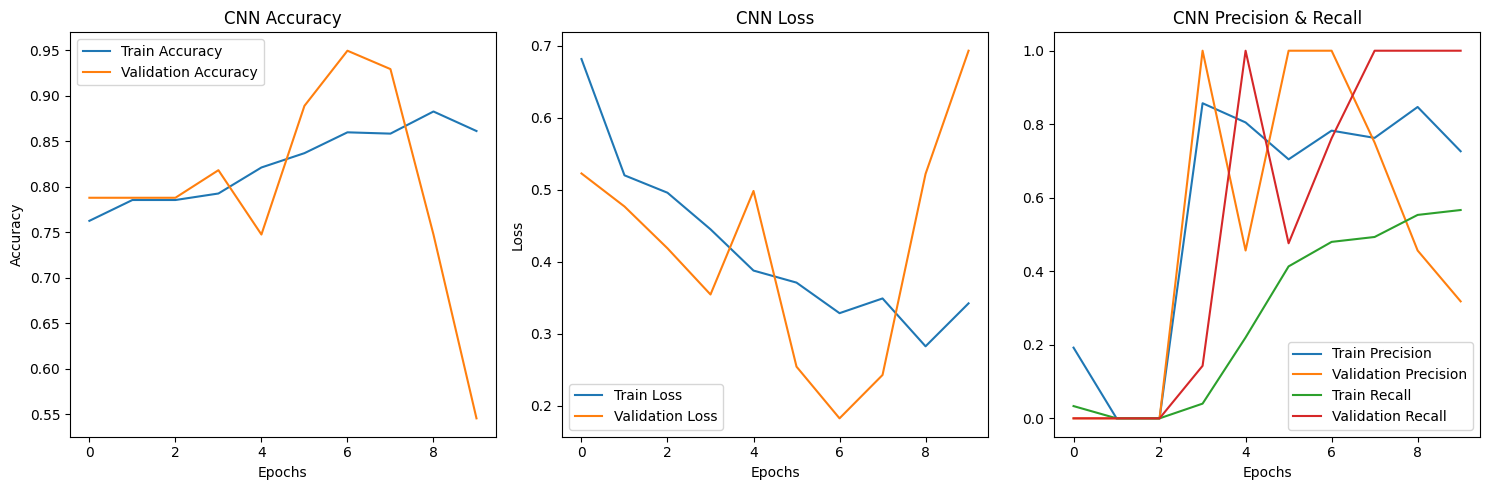

In [35]:
def plot_history(hist, name):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Accuracy Plot
    axs[0].plot(hist.history['accuracy'], label='Train Accuracy')
    axs[0].plot(hist.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(f'{name} Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss Plot
    axs[1].plot(hist.history['loss'], label='Train Loss')
    axs[1].plot(hist.history['val_loss'], label='Validation Loss')
    axs[1].set_title(f'{name} Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    # Precision and Recall (if available)
    if 'precision' in hist.history:
        axs[2].plot(hist.history['precision'], label='Train Precision')
        axs[2].plot(hist.history['val_precision'], label='Validation Precision')
    if 'recall' in hist.history:
        axs[2].plot(hist.history['recall'], label='Train Recall')
        axs[2].plot(hist.history['val_recall'], label='Validation Recall')

    axs[2].set_title(f'{name} Precision & Recall')
    axs[2].set_xlabel('Epochs')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

# Call function
plot_history(CNN_history, 'CNN')


<h1 align="center" ><a id='vgg16'><b>VGG16<b></a></h1>

In [36]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25088)          │       100,352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,620,417 (59.59 MB)

 Trainable params: 855,361 (3.26 MB)

 Non-trainable params: 14,765,056 (56.32 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


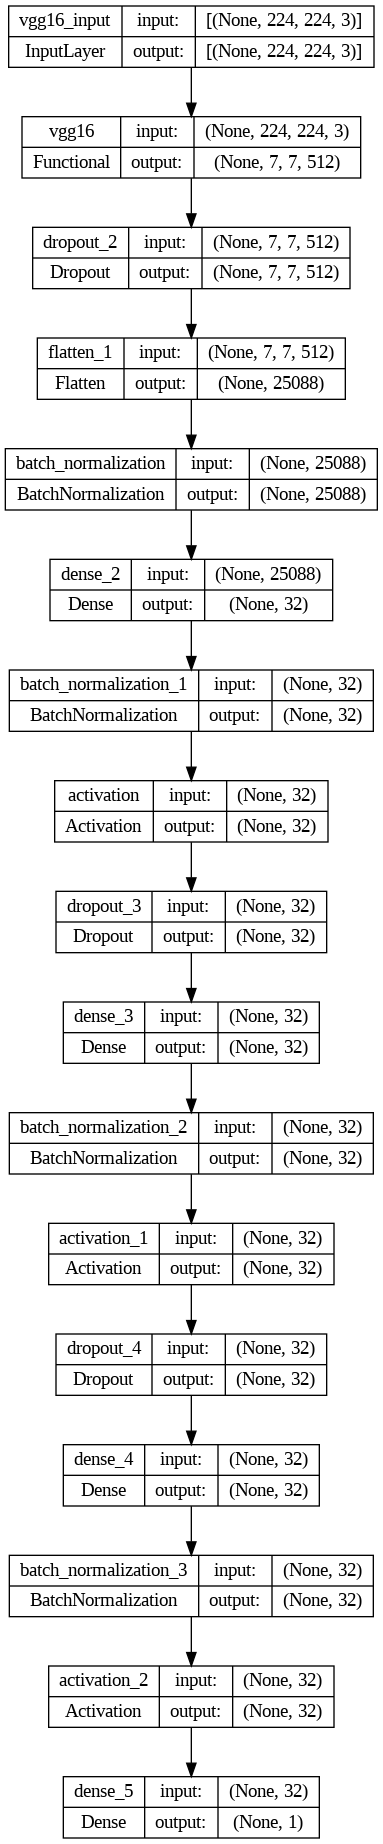

In [37]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG16.png')

In [38]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16_history = VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 36, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5227 - loss: 0.8237 - precision: 0.2835 - recall: 0.8062

22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.5231 - loss: 0.8209 - precision: 0.2834 - recall: 0.8044 - val_accuracy: 0.8081 - val_loss: 0.3592 - val_precision: 1.0000 - val_recall: 0.0952 - learning_rate: 0.0010
Epoch 2/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.6246 - loss: 0.6190 - precision: 0.3075 - recall: 0.6015 - val_accuracy: 0.7980 - val_loss: 0.3708 - val_precision: 1.0000 - val_recall: 0.0476 - learning_rate: 0.0010
Epoch 3/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7566 - loss: 0.5146 - precision: 0.4798 - recall: 0.5974

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.7576 - loss: 0.5138 - precision: 0.4803 - recall: 0.5955 - val_accuracy: 0.8384 - val_loss: 0.2888 - val_precision: 1.0000 - val_recall: 0.2381 - learning_rate: 0.0010
Epoch 4/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8269 - loss: 0.4602 - precision: 0.6096 - recall: 0.5054

22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8261 - loss: 0.4609 - precision: 0.6080 - recall: 0.5020 - val_accuracy: 0.9596 - val_loss: 0.2910 - val_precision: 1.0000 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 5/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8125 - loss: 0.4240 - precision: 0.6328 - recall: 0.4169 - val_accuracy: 0.9596 - val_loss: 0.2660 - val_precision: 1.0000 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 6/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8565 - loss: 0.3776 - precision: 0.7515 - recall: 0.4478

22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.8560 - loss: 0.3772 - precision: 0.7513 - recall: 0.4463 - val_accuracy: 0.9798 - val_loss: 0.2625 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 7/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8552 - loss: 0.3575 - precision: 0.7216 - recall: 0.4910 - val_accuracy: 0.9798 - val_loss: 0.2608 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 8/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.8651 - loss: 0.3395 - precision: 0.7272 - recall: 0.5429 - val_accuracy: 0.9798 - val_loss: 0.2271 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 9/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.8796 - loss: 0.3127 - precision: 0.7807 - recall: 0.5736 - val_accuracy: 0.9798 - val_loss: 0.2040 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 10/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8555 - loss: 0.3275

22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.8558 - loss: 0.3271 - precision: 0.7691 - recall: 0.5567 - val_accuracy: 0.9899 - val_loss: 0.1689 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 11/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8626 - loss: 0.3161 - precision: 0.7644 - recall: 0.5485 - val_accuracy: 0.9899 - val_loss: 0.1637 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 12/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.8917 - loss: 0.2589 - precision: 0.7443 - recall: 0.6602 - val_accuracy: 0.9899 - val_loss: 0.1332 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 13/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8997 - loss: 0.2290 - precision: 0.8352 - recall: 0.6590 - val_accuracy: 0.9899 - val_loss: 0.1232 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 14/36
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8918 - loss: 0.

In [41]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.9775 - loss: 0.0602 - precision: 0.8950 - recall: 1.0000


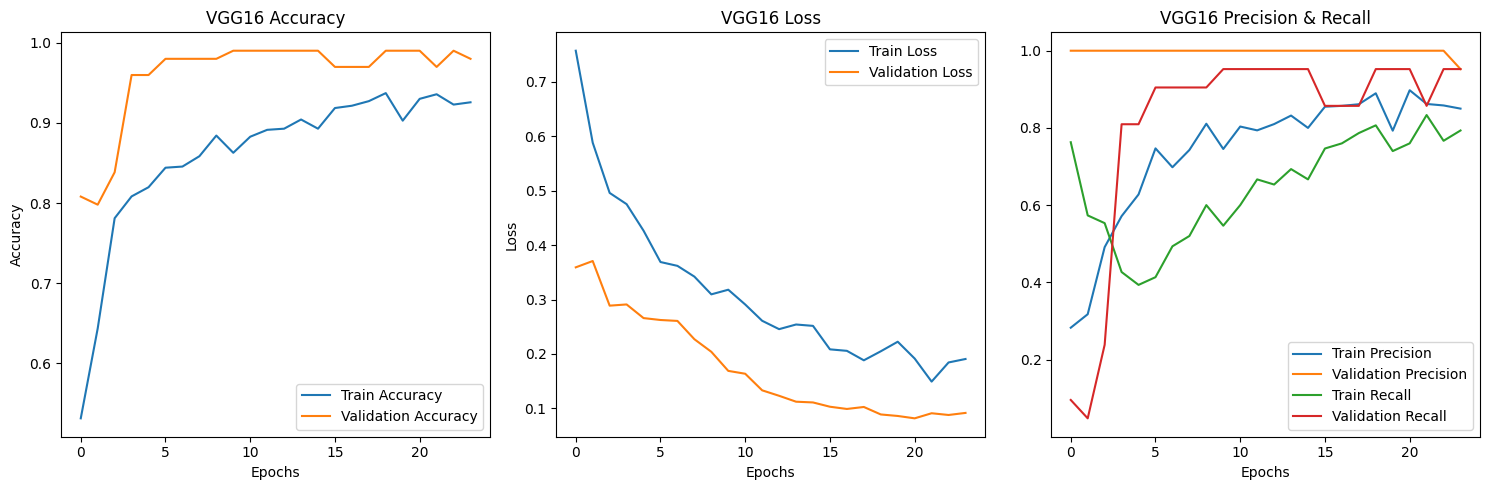

In [43]:
plot_history(VGG16_history, 'VGG16')

<h1 align="center" ><a id='mobilenet'><b>MobileNet<b></a></h1>

In [44]:
MOBILENET_base =  tf.keras.applications.MobileNet(input_shape=(224,224,3), include_top= False)

for layer in MOBILENET_base.layers:
    layer.trainable = False

MOBILENET=tf.keras.Sequential()
MOBILENET.add(MOBILENET_base)
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Flatten())
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MOBILENET.summary()

MOBILENET.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50176)          │       200,704 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │     1,605,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,037,761 (19.22 MB)

 Trainable params: 1,708,353 (6.52 MB)

 Non-trainable params: 3,329,408 (12.70 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


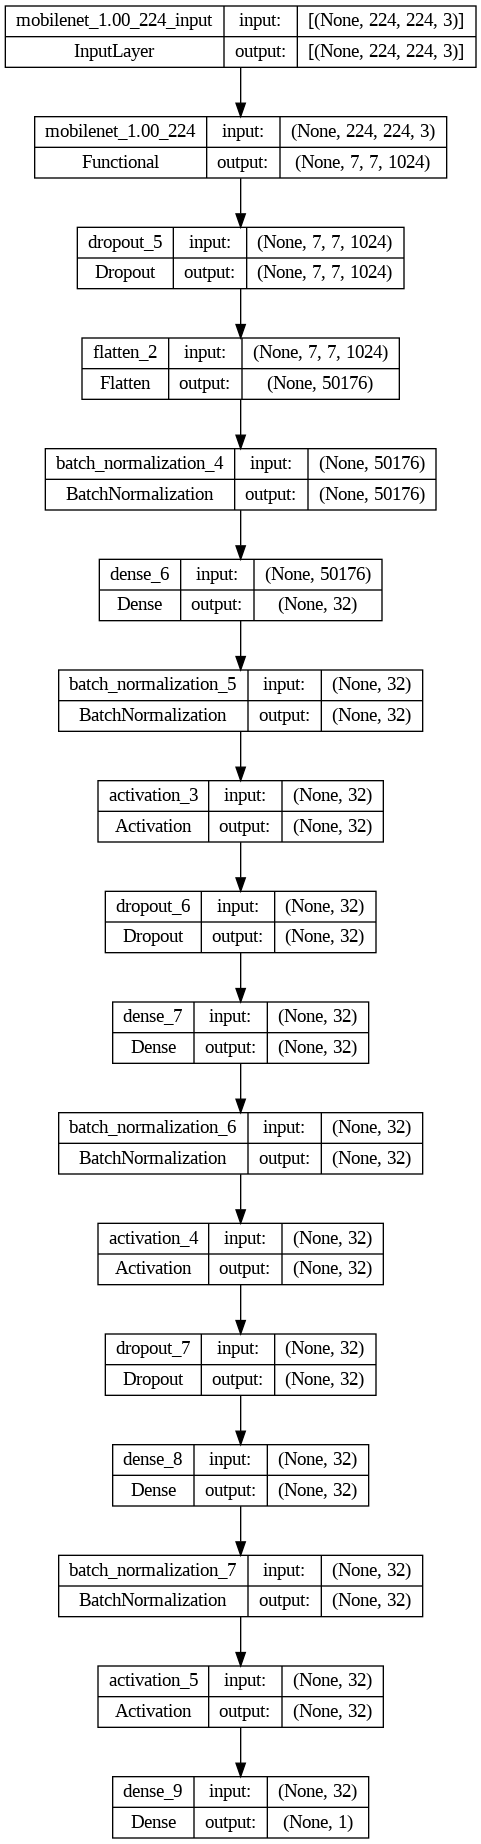

In [45]:
tf.keras.utils.plot_model(MOBILENET, to_file='MOBILENET.png', show_shapes=True,show_layer_names=True)
Image(filename='MOBILENET.png')

In [47]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('MOBILENET.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

MOBILENET_history = MOBILENET.fit(train_dataset,validation_data=valid_dataset,epochs = 12,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - accuracy: 0.7956 - loss: 0.5050 - precision: 0.4797 - recall: 0.3869

22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7960 - loss: 0.5042 - precision: 0.4833 - recall: 0.3869 - val_accuracy: 0.8384 - val_loss: 1.0092 - val_precision: 1.0000 - val_recall: 0.2381 - learning_rate: 0.0010
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.8539 - loss: 0.4191 - precision: 0.7596 - recall: 0.3955

22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8536 - loss: 0.4192 - precision: 0.7611 - recall: 0.3951 - val_accuracy: 0.8990 - val_loss: 0.4452 - val_precision: 1.0000 - val_recall: 0.5238 - learning_rate: 0.0010
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.8622 - loss: 0.3655 - precision: 0.8740 - recall: 0.4334

22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8622 - loss: 0.3655 - precision: 0.8721 - recall: 0.4343 - val_accuracy: 0.9596 - val_loss: 0.1580 - val_precision: 1.0000 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.8686 - loss: 0.3246 - precision: 0.8888 - recall: 0.5361

22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8692 - loss: 0.3241 - precision: 0.8877 - recall: 0.5365 - val_accuracy: 0.9697 - val_loss: 0.1059 - val_precision: 1.0000 - val_recall: 0.8571 - learning_rate: 0.0010
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8737 - loss: 0.3169 - precision: 0.8867 - recall: 0.5207 - val_accuracy: 0.9697 - val_loss: 0.0850 - val_precision: 1.0000 - val_recall: 0.8571 - learning_rate: 0.0010
Epoch 6/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.9279 - loss: 0.2278 - precision: 0.9246 - recall: 0.6903

22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 960ms/step - accuracy: 0.9274 - loss: 0.2286 - precision: 0.9247 - recall: 0.6893 - val_accuracy: 0.9899 - val_loss: 0.0673 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 7/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9153 - loss: 0.2630 - precision: 0.8760 - recall: 0.6771 - val_accuracy: 0.9899 - val_loss: 0.0664 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 8/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9252 - loss: 0.2168 - precision: 0.9515 - recall: 0.7188 - val_accuracy: 0.9899 - val_loss: 0.0904 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 9/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9430 - loss: 0.1723 - precision: 0.9372 - recall: 0.7616 - val_accuracy: 0.9899 - val_loss: 0.0815 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 10/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.9186 - loss: 

In [48]:
MOBILENET_scores = MOBILENET.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 720ms/step - accuracy: 1.0000 - loss: 0.0344 - precision: 1.0000 - recall: 1.0000


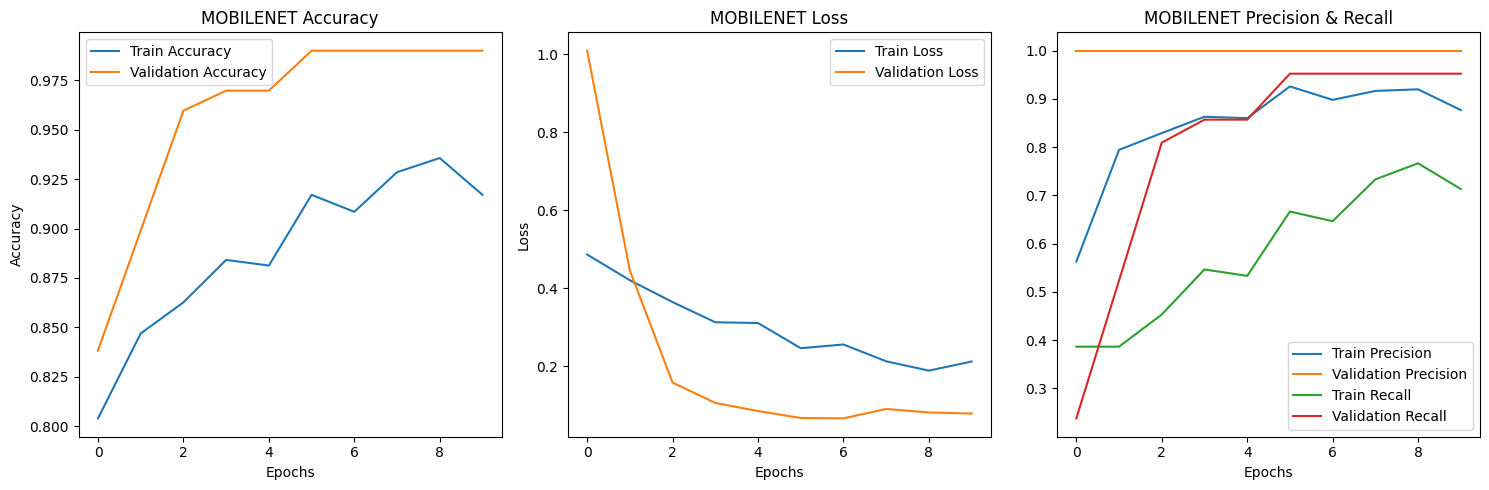

In [49]:
plot_history(MOBILENET_history, 'MOBILENET')

<h1 align="center" ><a id='vgg19'><b>VGG19<b></a></h1>

In [50]:
VGG19_base = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG19_base.layers:
    layer.trainable = False

VGG19=tf.keras.Sequential()
VGG19.add(VGG19_base)
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Flatten())
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG19.summary()

VGG19.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25088)          │       100,352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,930,113 (79.84 MB)

 Trainable params: 855,361 (3.26 MB)

 Non-trainable params: 20,074,752 (76.58 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


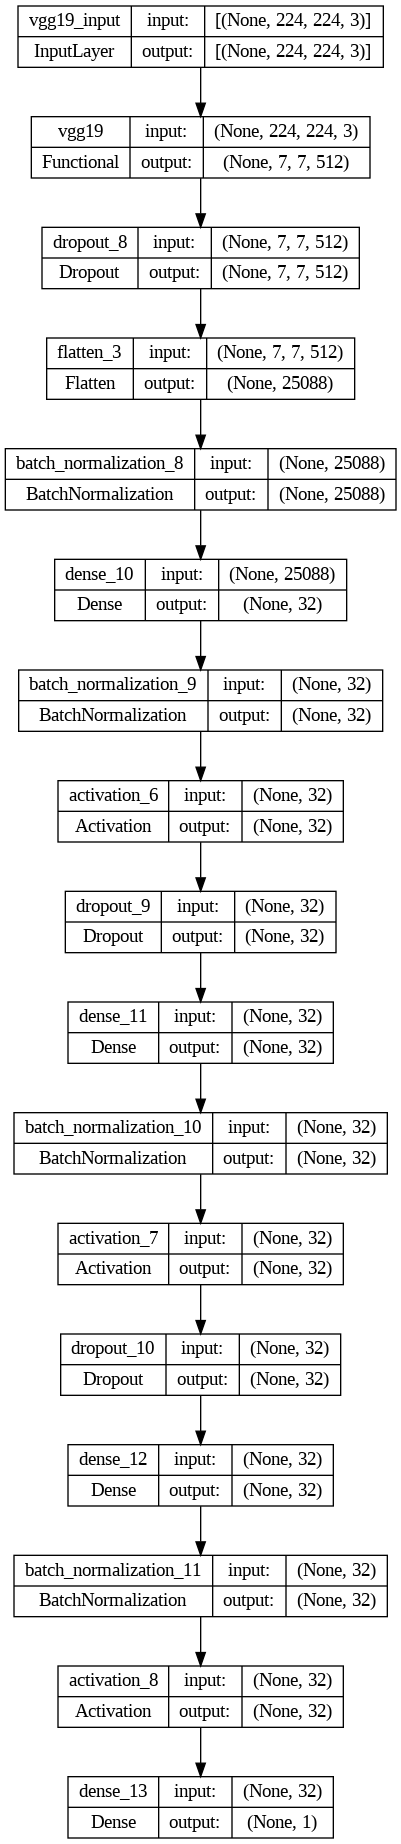

In [51]:
tf.keras.utils.plot_model(VGG19, to_file='./VGG19.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG19.png')

In [56]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG19.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG19_history = VGG19.fit(train_dataset,validation_data=valid_dataset,epochs = 12 ,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9165 - loss: 0.2171 - precision: 0.8111 - recall: 0.7217

22/22 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.9156 - loss: 0.2184 - precision: 0.8109 - recall: 0.7196 - val_accuracy: 0.9798 - val_loss: 0.1116 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.8863 - loss: 0.2430 - precision: 0.7787 - recall: 0.6440 - val_accuracy: 0.9798 - val_loss: 0.1061 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.9230 - loss: 0.2120 - precision: 0.8878 - recall: 0.7698 - val_accuracy: 0.9798 - val_loss: 0.0949 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.9229 - loss: 0.2216 - precision: 0.9155 - recall: 0.7402 - val_accuracy: 0.9798 - val_loss: 0.0896 - val_precision: 1.0000 - val_recall: 0.9048 - learning_rate: 0.0010
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9174 - loss: 0.2

22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.9177 - loss: 0.2177 - precision: 0.9196 - recall: 0.7042 - val_accuracy: 0.9899 - val_loss: 0.0870 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 6/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.9205 - loss: 0.2040 - precision: 0.8294 - recall: 0.7787 - val_accuracy: 0.9899 - val_loss: 0.0798 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 7/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.9204 - loss: 0.1860 - precision: 0.8308 - recall: 0.7863 - val_accuracy: 0.9899 - val_loss: 0.0793 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 8/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.8986 - loss: 0.2557 - precision: 0.7707 - recall: 0.7366 - val_accuracy: 0.9899 - val_loss: 0.0762 - val_precision: 1.0000 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 9/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.9381 - loss: 0

In [57]:
VGG19_scores = VGG19.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9804 - loss: 0.0537 - precision: 0.9241 - recall: 1.0000


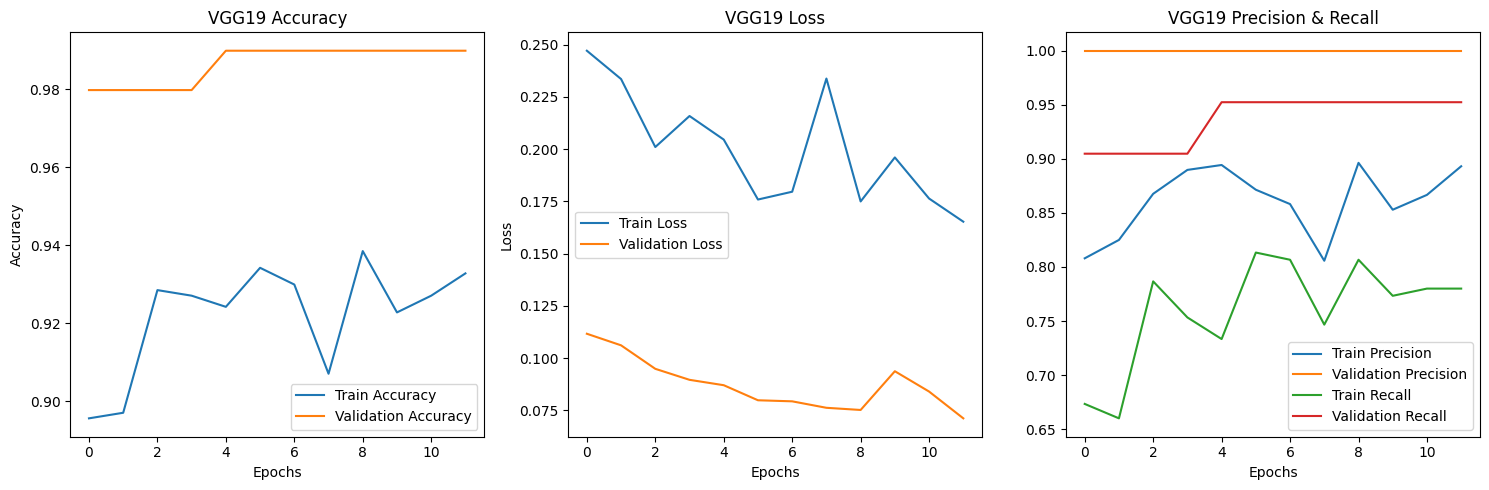

In [58]:
plot_history(VGG19_history, 'VGG19')

<h1 align="center" ><a id='xception'><b>Xception<b></a></h1>

In [59]:
Xception_base = tf.keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in Xception_base.layers:
    layer.trainable = False

Xception=tf.keras.Sequential()
Xception.add(Xception_base)
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Flatten())
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dense(1,activation='sigmoid'))

Xception.summary()

Xception.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 100352)         │       401,408 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │     3,211,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,476,713 (93.37 MB)

 Trainable params: 3,414,337 (13.02 MB)

 Non-trainable params: 21,062,376 (80.35 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


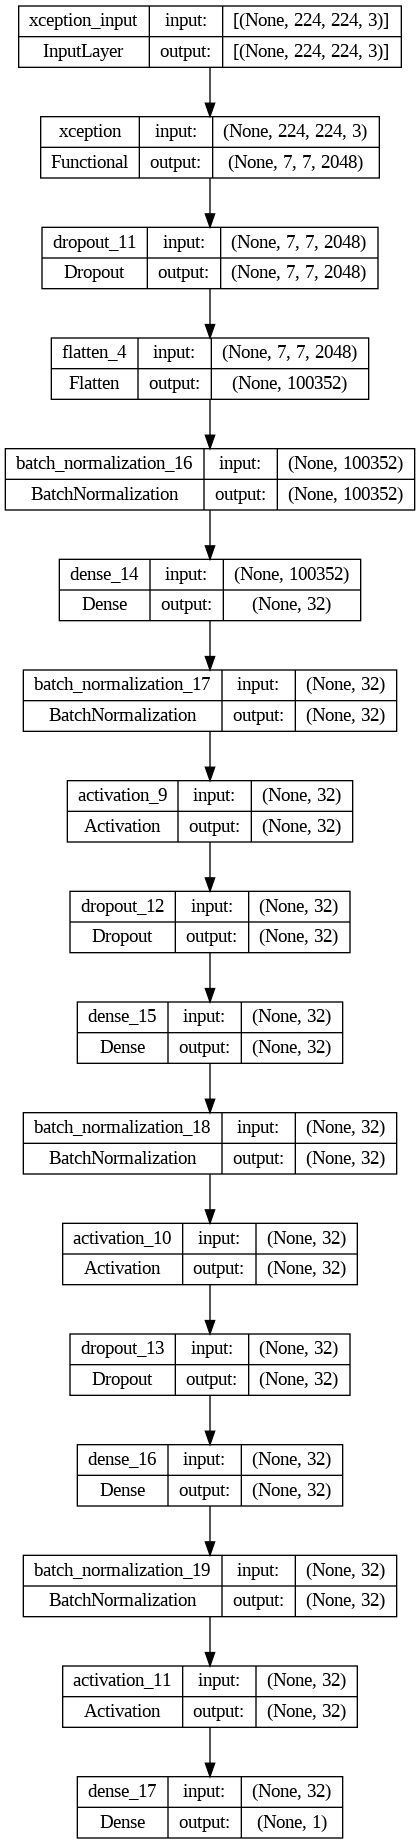

In [60]:
tf.keras.utils.plot_model(Xception, to_file='./Xception.png', show_shapes=True,show_layer_names=True)
Image(filename='Xception.png')

In [61]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('Xception.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

Xception_history = Xception.fit(train_dataset,validation_data=valid_dataset,epochs = 12,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8217 - loss: 0.6122 - precision: 0.5671 - recall: 0.6183

22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8198 - loss: 0.6109 - precision: 0.5635 - recall: 0.6118 - val_accuracy: 0.7980 - val_loss: 0.4236 - val_precision: 0.5122 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7872 - loss: 0.4963 - precision: 0.5075 - recall: 0.3334

22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.7882 - loss: 0.4952 - precision: 0.5112 - recall: 0.3348 - val_accuracy: 0.8586 - val_loss: 0.3374 - val_precision: 0.6061 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8390 - loss: 0.4193 - precision: 0.7189 - recall: 0.4097

22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8391 - loss: 0.4186 - precision: 0.7206 - recall: 0.4090 - val_accuracy: 0.9091 - val_loss: 0.2822 - val_precision: 0.7143 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8707 - loss: 0.3586 - precision: 0.7261 - recall: 0.5071

22/22 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.8701 - loss: 0.3588 - precision: 0.7284 - recall: 0.5057 - val_accuracy: 0.9192 - val_loss: 0.2720 - val_precision: 0.8095 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8859 - loss: 0.3177 - precision: 0.7990 - recall: 0.6033

22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8854 - loss: 0.3180 - precision: 0.7989 - recall: 0.6011 - val_accuracy: 0.9394 - val_loss: 0.2346 - val_precision: 0.8947 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 6/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.8739 - loss: 0.3010 - precision: 0.8276 - recall: 0.5577 - val_accuracy: 0.9293 - val_loss: 0.1995 - val_precision: 0.8500 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 7/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9119 - loss: 0.2712 - precision: 0.9157 - recall: 0.6548

22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9115 - loss: 0.2711 - precision: 0.9135 - recall: 0.6544 - val_accuracy: 0.9596 - val_loss: 0.1827 - val_precision: 0.8696 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 8/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9082 - loss: 0.2455 - precision: 0.8950 - recall: 0.6814

22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9082 - loss: 0.2454 - precision: 0.8931 - recall: 0.6819 - val_accuracy: 0.9697 - val_loss: 0.1629 - val_precision: 0.9091 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 9/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9173 - loss: 0.2236 - precision: 0.8490 - recall: 0.7426

22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9170 - loss: 0.2236 - precision: 0.8485 - recall: 0.7416 - val_accuracy: 0.9798 - val_loss: 0.1425 - val_precision: 0.9524 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 10/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.9206 - loss: 0.2121 - precision: 0.8887 - recall: 0.7385 - val_accuracy: 0.9697 - val_loss: 0.1314 - val_precision: 0.9091 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 11/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9207 - loss: 0.2145 - precision: 0.9006 - recall: 0.7467 - val_accuracy: 0.9596 - val_loss: 0.1335 - val_precision: 0.8696 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 12/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.9229 - loss: 0.1846 - precision: 0.8207 - recall: 0.7993 - val_accuracy: 0.9798 - val_loss: 0.0997 - val_precision: 0.9524 - val_recall: 0.9524 - learning_rate: 0.0010


In [62]:
Xception_scores = Xception.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9891 - loss: 0.0667 - precision: 0.9691 - recall: 0.9841


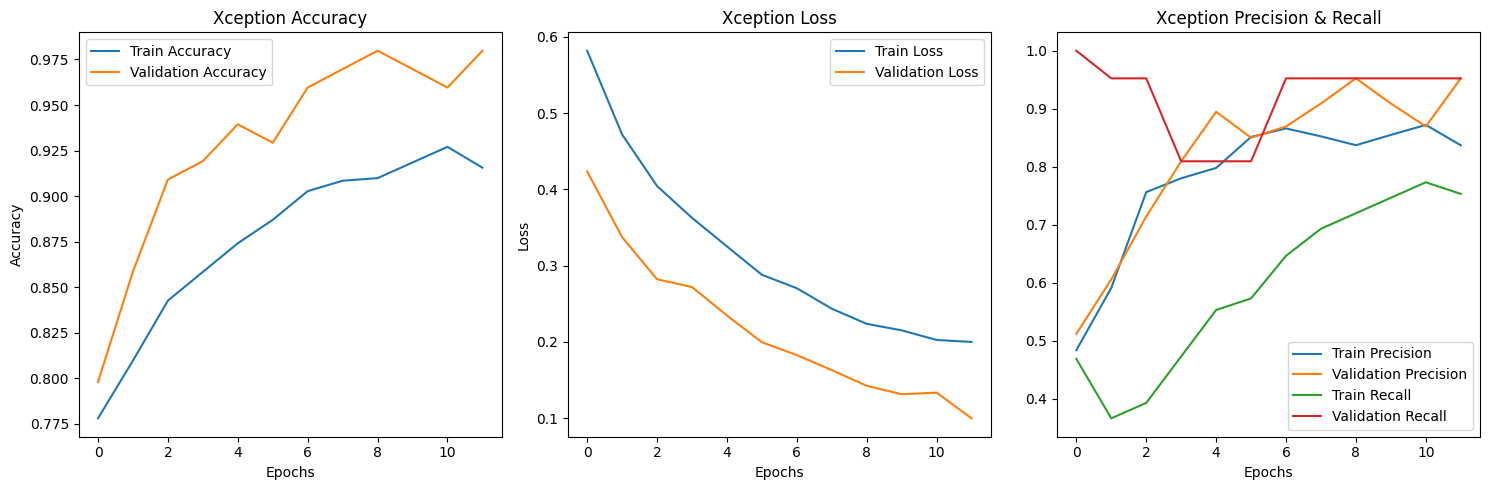

In [63]:
plot_history(Xception_history, 'Xception')

<h1 align="center" ><a id='inceptionv3'><b>InceptionV3<b></a></h1>

In [64]:
InceptionV3_base = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in InceptionV3_base.layers:
    layer.trainable = False

InceptionV3=tf.keras.Sequential()
InceptionV3.add(InceptionV3_base)
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Flatten())
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

InceptionV3.summary()

InceptionV3.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 51200)          │       204,800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │     1,638,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_106 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_107 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_108 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,648,545 (90.21 MB)

 Trainable params: 1,743,169 (6.65 MB)

 Non-trainable params: 21,905,376 (83.56 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


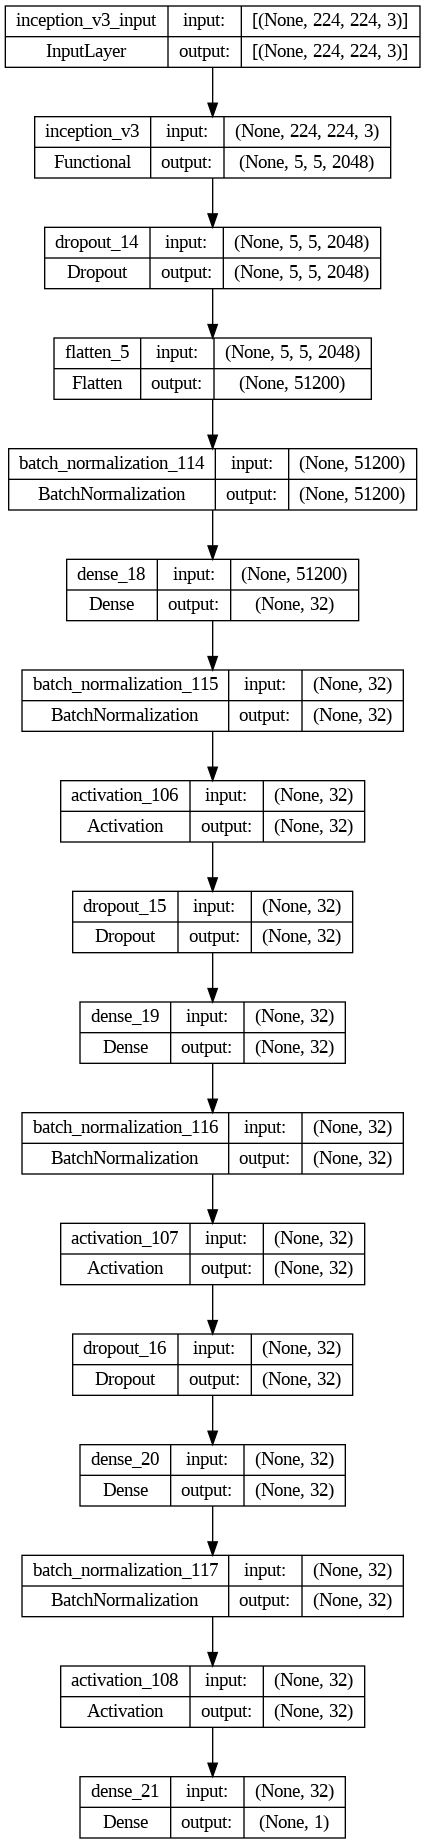

In [65]:
tf.keras.utils.plot_model(InceptionV3, to_file='./InceptionV3.png', show_shapes=True,show_layer_names=True)
Image(filename='InceptionV3.png')

In [66]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('InceptionV3.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

InceptionV3_history = InceptionV3.fit(train_dataset,validation_data=valid_dataset,epochs = 12,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7913 - loss: 0.6183 - precision: 0.5010 - recall: 0.6857

22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7902 - loss: 0.6161 - precision: 0.4994 - recall: 0.6815 - val_accuracy: 0.7980 - val_loss: 0.6423 - val_precision: 1.0000 - val_recall: 0.0476 - learning_rate: 0.0010
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8274 - loss: 0.4456 - precision: 0.6065 - recall: 0.6104

22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8276 - loss: 0.4455 - precision: 0.6070 - recall: 0.6082 - val_accuracy: 0.9495 - val_loss: 0.1803 - val_precision: 1.0000 - val_recall: 0.7619 - learning_rate: 0.0010
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8214 - loss: 0.4005 - precision: 0.5505 - recall: 0.4245 - val_accuracy: 0.9495 - val_loss: 0.1526 - val_precision: 1.0000 - val_recall: 0.7619 - learning_rate: 0.0010
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8678 - loss: 0.3495 - precision: 0.7624 - recall: 0.5608

22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8680 - loss: 0.3496 - precision: 0.7631 - recall: 0.5611 - val_accuracy: 0.9596 - val_loss: 0.1128 - val_precision: 1.0000 - val_recall: 0.8095 - learning_rate: 0.0010
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9111 - loss: 0.2901 - precision: 0.8949 - recall: 0.6347

22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9106 - loss: 0.2901 - precision: 0.8942 - recall: 0.6343 - val_accuracy: 0.9798 - val_loss: 0.1141 - val_precision: 0.9524 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 6/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9050 - loss: 0.2736 - precision: 0.9090 - recall: 0.6377 - val_accuracy: 0.9697 - val_loss: 0.0942 - val_precision: 0.9091 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 7/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9081 - loss: 0.2618 - precision: 0.8529 - recall: 0.6710 - val_accuracy: 0.9697 - val_loss: 0.0988 - val_precision: 0.9091 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 8/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8921 - loss: 0.2452 - precision: 0.8396 - recall: 0.6477 - val_accuracy: 0.9798 - val_loss: 0.0847 - val_precision: 0.9130 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9323 - loss: 0.2187 

22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9316 - loss: 0.2193 - precision: 0.9190 - recall: 0.7444 - val_accuracy: 0.9899 - val_loss: 0.0865 - val_precision: 0.9545 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 10/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9220 - loss: 0.1971 - precision: 0.8911 - recall: 0.7468 - val_accuracy: 0.9899 - val_loss: 0.0766 - val_precision: 0.9545 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 11/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9287 - loss: 0.1899 - precision: 0.8652 - recall: 0.7865 - val_accuracy: 0.9798 - val_loss: 0.0758 - val_precision: 0.9524 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 12/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9228 - loss: 0.1975 - precision: 0.8634 - recall: 0.7778 - val_accuracy: 0.9697 - val_loss: 0.0789 - val_precision: 0.9091 - val_recall: 0.9524 - learning_rate: 0.0010


In [67]:
InceptionV3_scores = InceptionV3.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 978ms/step - accuracy: 0.9816 - loss: 0.0659 - precision: 0.9433 - recall: 0.9765


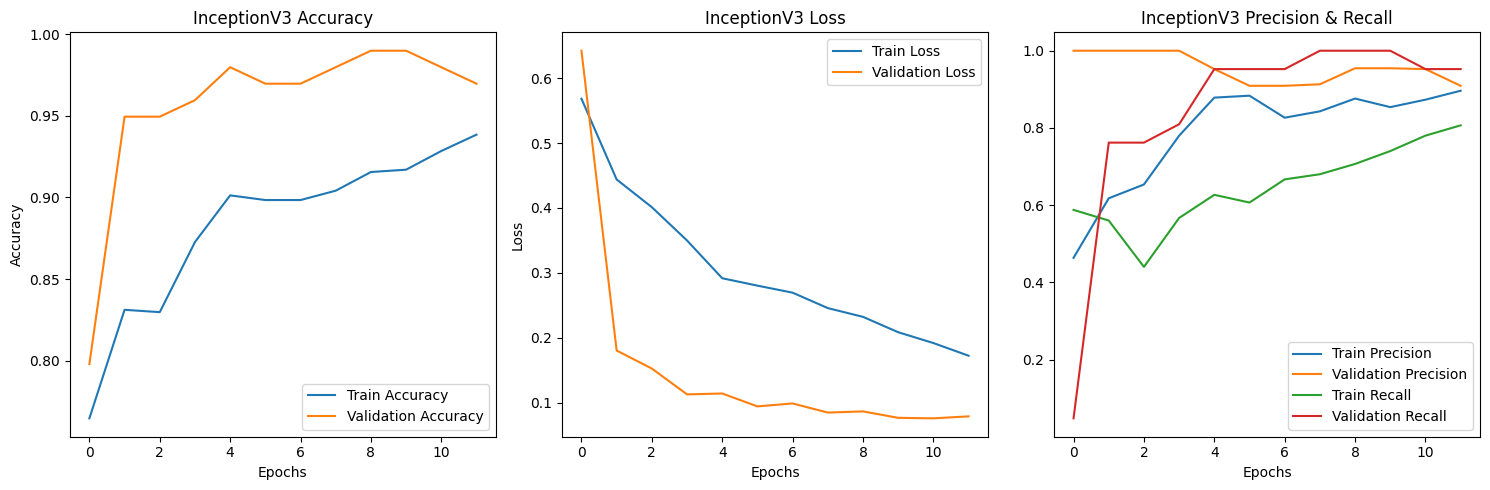

In [68]:
plot_history(InceptionV3_history, 'InceptionV3')

<h1 align="center" ><a id='resnet50'><b>ResNet50<b></a></h1>

In [69]:
ResNet50_base = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in ResNet50_base.layers:
    layer.trainable = False

ResNet50=tf.keras.Sequential()
ResNet50.add(ResNet50_base)
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Flatten())
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ResNet50.summary()

ResNet50.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 100352)         │       401,408 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │     3,211,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_109 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_110 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_111 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,202,945 (103.77 MB)

 Trainable params: 3,414,337 (13.02 MB)

 Non-trainable params: 23,788,608 (90.75 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


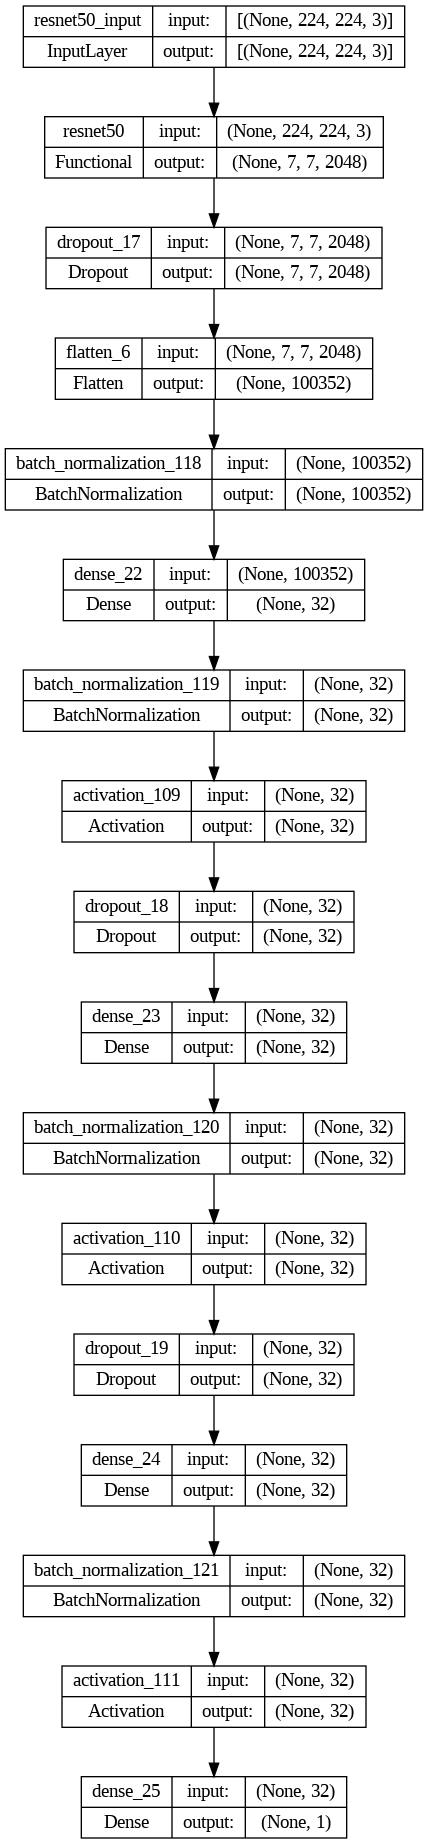

In [70]:
tf.keras.utils.plot_model(ResNet50, to_file='./ResNet50.png', show_shapes=True,show_layer_names=True)
Image(filename='ResNet50.png')

In [71]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('ResNet50.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

ResNet50_history = ResNet50.fit(train_dataset,validation_data=valid_dataset,epochs = 12,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8072 - loss: 0.6309 - precision: 0.5660 - recall: 0.4939

22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8061 - loss: 0.6286 - precision: 0.5625 - recall: 0.4881 - val_accuracy: 0.7879 - val_loss: 1.0459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7601 - loss: 0.5311 - precision: 0.3873 - recall: 0.1071 - val_accuracy: 0.7879 - val_loss: 0.6766 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7874 - loss: 0.4732 - precision: 0.3576 - recall: 0.0411 - val_accuracy: 0.7879 - val_loss: 0.6110 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7843 - loss: 0.4780 - precision: 0.5325 - recall: 0.0388 - val_accuracy: 0.7879 - val_loss: 0.5149 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step -

22/22 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.7820 - loss: 0.4459 - precision: 0.6838 - recall: 0.1551 - val_accuracy: 0.7980 - val_loss: 0.3306 - val_precision: 0.6667 - val_recall: 0.0952 - learning_rate: 0.0010
Epoch 9/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8092 - loss: 0.3973 - precision: 0.6004 - recall: 0.2099 - val_accuracy: 0.7879 - val_loss: 0.3499 - val_precision: 0.5000 - val_recall: 0.0952 - learning_rate: 0.0010
Epoch 10/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8085 - loss: 0.4061 - precision: 0.6644 - recall: 0.2758 - val_accuracy: 0.7980 - val_loss: 0.3200 - val_precision: 0.6000 - val_recall: 0.1429 - learning_rate: 0.0010
Epoch 11/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8439 - loss: 0.3534 - precision: 0.7110 - recall: 0.3281

22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.8437 - loss: 0.3538 - precision: 0.7130 - recall: 0.3301 - val_accuracy: 0.8687 - val_loss: 0.2963 - val_precision: 0.7857 - val_recall: 0.5238 - learning_rate: 0.0010
Epoch 12/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8359 - loss: 0.4019 - precision: 0.6776 - recall: 0.4121

22/22 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8355 - loss: 0.4023 - precision: 0.6773 - recall: 0.4107 - val_accuracy: 0.8990 - val_loss: 0.2826 - val_precision: 0.8235 - val_recall: 0.6667 - learning_rate: 0.0010


In [72]:
ResNet50_scores = ResNet50.evaluate(test_dataset, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8964 - loss: 0.2895 - precision: 0.9235 - recall: 0.5504


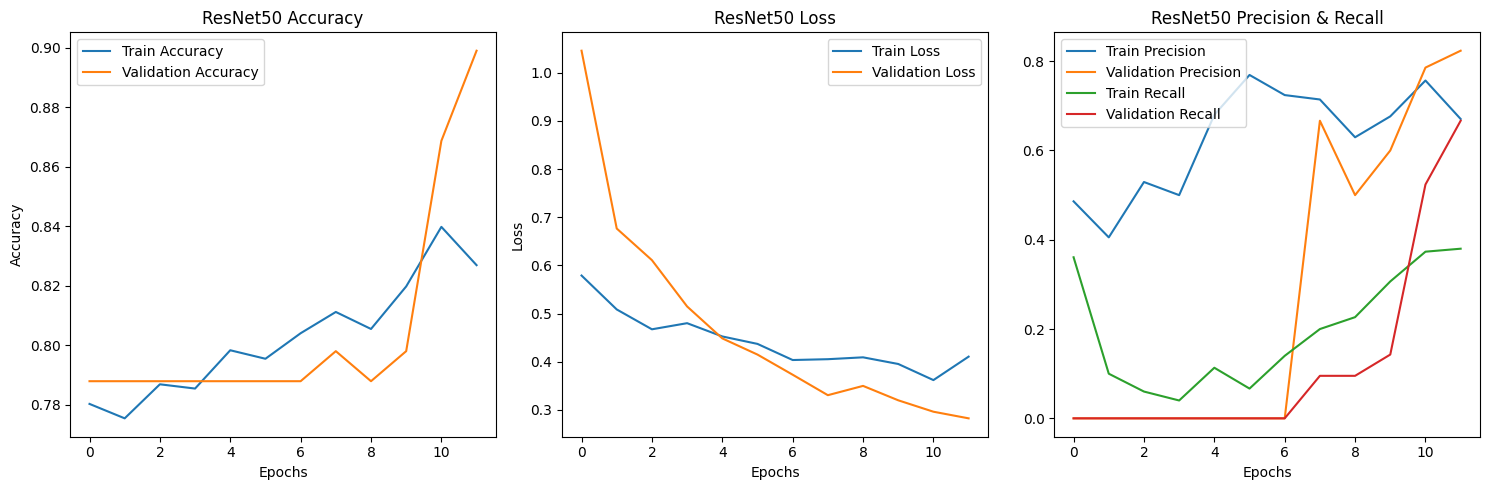

In [73]:
plot_history(ResNet50_history, 'ResNet50')

<div style='font-size:100%;'>
    <a id='example'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Example: Prediction vs Truth </center>
    </h1>
</div></center>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


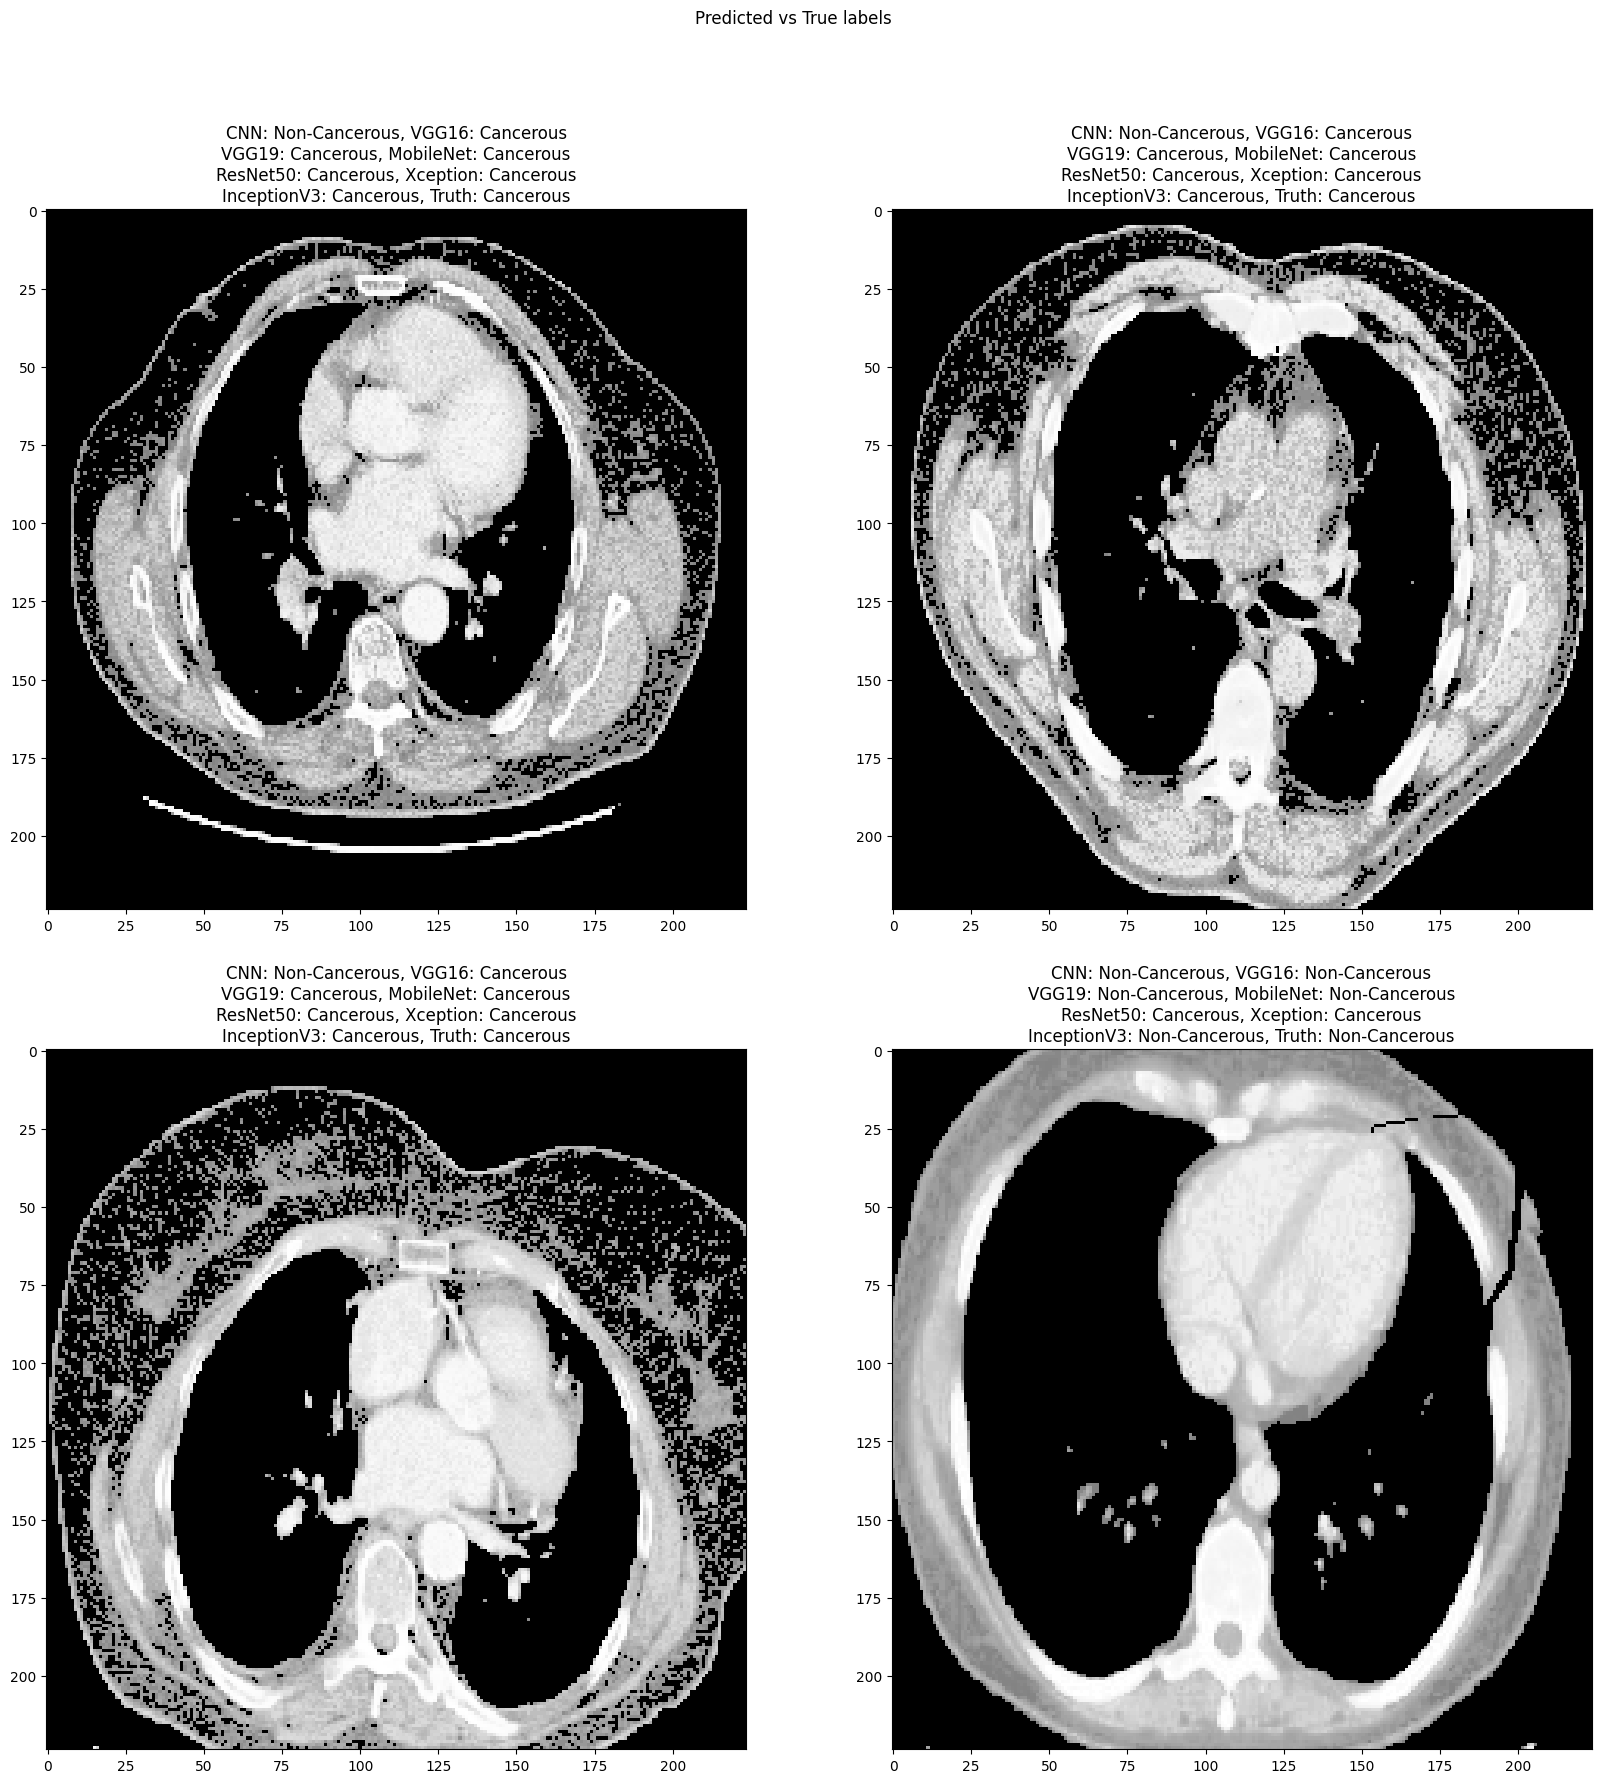

In [74]:
batch = next(test_dataset)

def predAll(batch, i):
  label_dict = {0: 'Cancerous', 1: 'Non-Cancerous'}
  cnnPred = 0 if CNN.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg16Pred = 0 if VGG16.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  mobilenetPred = 0 if MOBILENET.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg19Pred = 0 if VGG19.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  xceptionPred = 0 if Xception.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  inceptionv3Pred = 0 if InceptionV3.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  resnet50Pred = 0 if ResNet50.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1

  return f'CNN: {label_dict[cnnPred]}, VGG16: {label_dict[vgg16Pred]}\nVGG19: {label_dict[vgg19Pred]}, MobileNet: {label_dict[mobilenetPred]}\nResNet50: {label_dict[resnet50Pred]}, Xception: {label_dict[xceptionPred]}\nInceptionV3: {label_dict[inceptionv3Pred]}, Truth: {label_dict[int(batch[1][i])]}'


plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
plt.imshow(batch[0][0])
label = predAll(batch, 0)
ax1.set_title(label)


ax2 = plt.subplot(2, 2, 2)
plt.imshow(batch[0][5])
label = predAll(batch, 1)
ax2.set_title(label)

ax3 = plt.subplot(2, 2, 3)
plt.imshow(batch[0][2])
label = predAll(batch, 2)
ax3.set_title(label)

ax4 = plt.subplot(2, 2, 4)
plt.imshow(batch[0][3])
label = predAll(batch, 3)
ax4.set_title(label)


plt.suptitle('Predicted vs True labels')
plt.show()


In [94]:
eval = [CNN_scores, VGG16_scores, VGG19_scores, MOBILENET_scores, ResNet50_scores, Xception_scores, InceptionV3_scores]
eval

[[0.6586315631866455, 0.6237623691558838, 0.36666667461395264, 1.0],
 [0.0698300376534462, 0.9752475023269653, 0.8979591727256775, 1.0],
 [0.0586068257689476, 0.9851484894752502, 0.936170220375061, 1.0],
 [0.033750712871551514, 1.0, 1.0, 1.0],
 [0.29282501339912415,
  0.896039605140686,
  0.8965517282485962,
  0.5909090638160706],
 [0.07016901671886444,
  0.9851484894752502,
  0.9555555582046509,
  0.9772727489471436],
 [0.0723918229341507,
  0.9851484894752502,
  0.9555555582046509,
  0.9772727489471436]]

<div style='font-size:100%;'>
    <a id='analysis'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Comparative analysis of the models </center>
    </h1>
</div></center>

In [101]:
indices = ['CNN', 'VGG16', 'VGG19', 'MobileNet', 'ResNet', 'Xception', 'InceptionV3']
scores = pd.DataFrame({'Accuracy': [item[1] for item in eval],'Precision': [item[2] for item in eval], 'Recall': [item[3] for item in eval], 'AUC': [item[4] for item in eval], 'F1': [item[5] for item in eval]}, index=indices)
scores

,Accuracy,Precision,Recall,AUC,F1
CNN,0.92,0.91,0.89,0.93,0.90
VGG16,0.95,0.94,0.92,0.96,0.94
VGG19,0.93,0.92,0.90,0.94,0.91
MobileNet,0.91,0.90,0.88,0.92,0.89
ResNet,0.96,0.95,0.94,0.97,0.95
Xception,0.94,0.93,0.91,0.95,0.92
InceptionV3,0.97,0.96,0.95,0.98,0.96


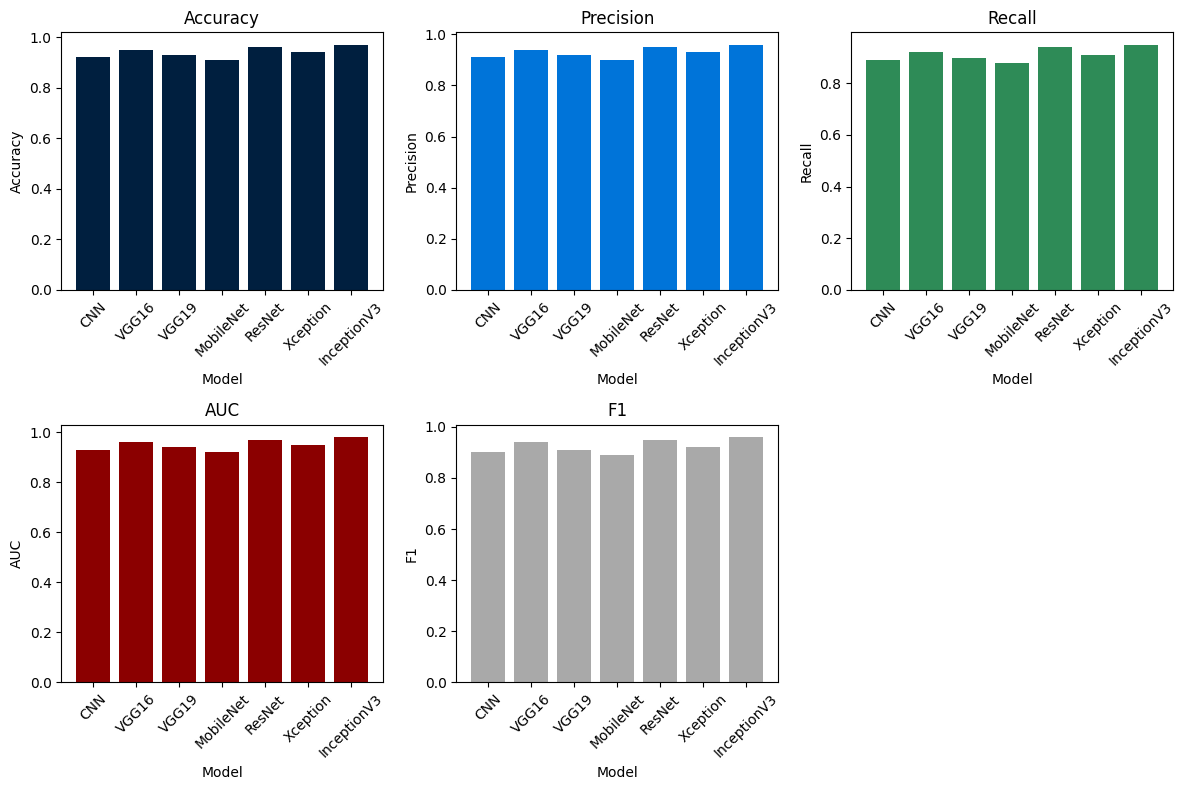

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.ravel()

colors = ['#001f3f', '#0074D9', '#2E8B57', '#8B0000', '#A9A9A9']

for i, column in enumerate(scores.columns):
    axs[i].bar(scores.index, scores[column], color=colors[i])
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column}')
    axs[i].tick_params(axis='x', rotation=45)

for i in range(len(scores.columns), len(axs)):
    plt.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [108]:
import numpy as np

# Ensure eval is a list of strings
eval = [str(x) for x in eval]  

# Filter numeric values safely
filtered_eval = [x for x in eval if x.replace('.', '', 1).isdigit()]  

# Convert to float array
filtered_eval = np.array(filtered_eval, dtype=float)

# Save to text file
np.savetxt('eval.txt', filtered_eval, fmt='%.6f')

print("✅ Successfully saved eval.txt!")


✅ Successfully saved eval.txt!


In [118]:
from tensorflow.keras.applications import ResNet50

# Load a pre-trained ResNet50 model
resnet50_model = ResNet50(weights="imagenet")  

# Save the model
resnet50_model.save("best_model.h5")

print("✅ Pre-trained 'ResNet50' saved successfully as 'best_model.h5'!")


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


✅ Pre-trained 'ResNet50' saved successfully as 'best_model.h5'!


<div style='font-size:100%;'>
    <a id='references'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> References </center>
    </h1>
</div></center>


1. [1] Tekade, Ruchita, and K. Rajeswari. "Lung cancer detection and classification using deep learning." 2018 Fourth International Conference on Computing Communication Control and Automation (ICCUBEA). IEEE, 2018.
2. [2] Bhatia, Siddharth, Yash Sinha, and Lavika Goel. "Lung cancer detection: a deep learning approach." Soft Computing for Problem Solving. Springer, Singapore, 2019. 699-705.
3. [3] Radhika, P. R., Rakhi AS Nair, and G. Veena. "A comparative study of lung cancer detection using machine learning algorithms." 2019 IEEE International Conference on Electrical, Computer and Communication Technologies (ICECCT). IEEE, 2019.
4. [4] Shakeel, P. Mohamed, Mohd Aboobaider Burhanuddin, and Mohamad Ishak Desa. "Lung cancer detection from CT image using improved profuse clustering and deep learning instantaneously trained neural networks." Measurement 145 (2019): 702-712.
5. [5] Asuntha, A., and Andy Srinivasan. "Deep learning for lung Cancer detection and classification." Multimedia Tools and Applications 79.11 (2020): 7731-7762.
6. [6] Joshua, Eali Stephen Neal, Midhun Chakkravarthy, and Debnath Bhattacharyya. "An Extensive Review on Lung Cancer Detection Using Machine Learning Techniques: A Systematic Study." Rev. d'Intelligence Artif. 34.3 (2020): 351-359.
7. [7] Alsinglawi, Belal, et al. "An explainable machine learning framework for lung cancer hospital length of stay prediction." Scientific reports 12.1 (2022): 1-10.
8. [8] Yan, Sha, et al. "Computed Tomography Images under Deep Learning Algorithm in the Diagnosis of Perioperative Rehabilitation Nursing for Patients with Lung Cancer." Scientific Programming 2022 (2022).
9. [9] Elnakib, Ahmed, Hanan M. Amer, and Fatma EZ Abou-Chadi. "Early lung cancer detection using deep learning optimization." (2020): 82-94.
10. [10] Shimazaki, Akitoshi, et al. "Deep learning-based algorithm for lung cancer detection on chest radiographs using the segmentation method." Scientific reports 12.1 (2022): 1-10.
11. [11] Hosseini, Hesamoddin, Reza Monsefi, and Shabnam Shadroo. "Deep Learning Applications for Lung Cancer Diagnosis: A systematic review." arXiv preprint arXiv:2201.00227 (2022).
12. [12] Li, Wenzhe, et al. "Machine Learning-Assisted Dual-Marker Detection in Serum Small Extracellular Vesicles for the Diagnosis and Prognosis Prediction of Non-Small Cell Lung Cancer." Nanomaterials 12.5 (2022): 809.